In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_70861_R')

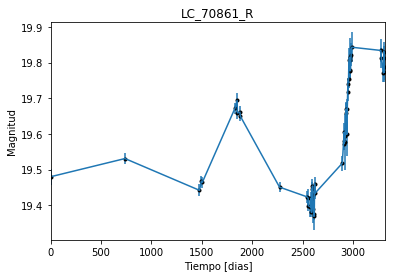

In [2]:
data = np.genfromtxt('LC_70861_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_70861_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

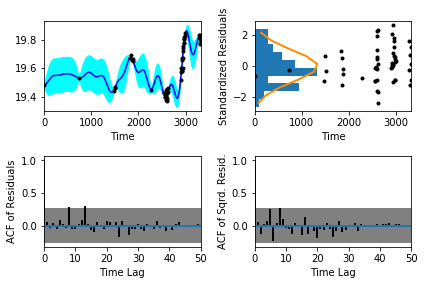

In [5]:
sample.assess_fit()

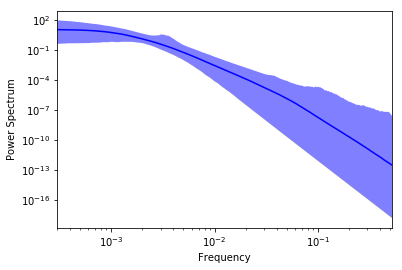

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_70861_R')

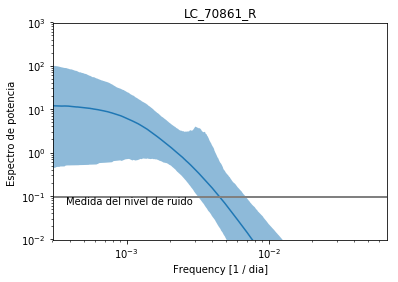

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_70861_R')

Text(0.5,1,'Prediccion , valor esperado 70861_R')

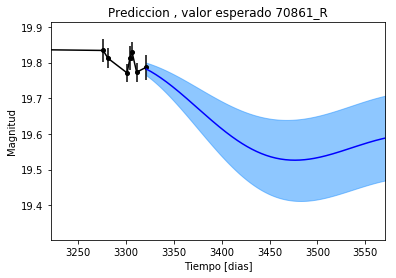

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado 70861_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_70861_R')

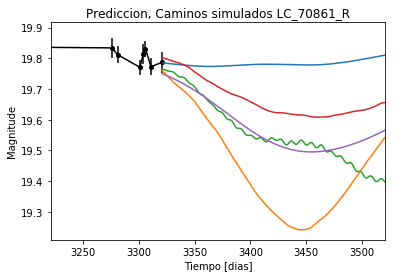

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_70861_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_70861_R')

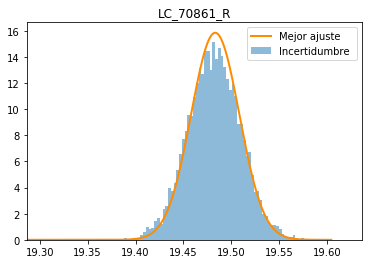

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_70861_R')

Text(0.5,1,'Interpolacion, camino simulado LC_70861_R')

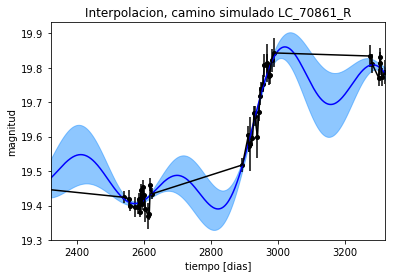

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_70861_R')

Text(0.5,1,'Interpolacion, camino simulado LC_70861_R')

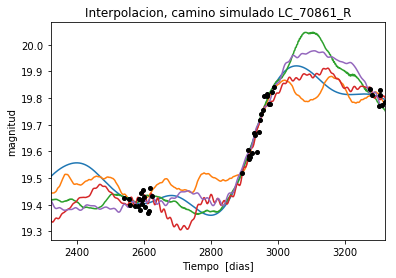

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_70861_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 667.625130626
Median: 0.00291655303585
Standard deviation: 0.144487363801
68% credibility interval: [ 0.00061426  0.08127766]
95% credibility interval: [  3.35851842e-04   5.50389464e-01]
99% credibility interval: [  3.10065509e-04   8.79072144e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 380.082416517
Median: 0.00121428722165
Standard deviation: 0.0492260594735
68% credibility interval: [ 0.00045854  0.00811699]
95% credibility interval: [ 0.00032214  0.14010365]
99% credibility interval: [  3.04871153e-04   3.43298034e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 533.891805309
Median: 0.00682059258806
Standar

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1435.16226424
Median: 119.43447611
Standard deviation: 1.74603045845
68% credibility interval: [ 117.51794152  120.69625159]
95% credibility interval: [ 114.89812083  121.75126844]
99% credibility interval: [ 112.86083789  122.4069927 ]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 490.295391968
Median: 0.299999280247
Standard deviation: 1.59036255343
68% credibility interval: [ 0.03355579  2.44962684]
95% credibility interval: [ 0.01397921  5.77693255]
99% credibility interval: [ 0.01009616  6.87071445]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1860.57024365
Median: 0.0822001844274
Standard deviation: 6.85881545712
68% credibility interval: [  2.11546626e-03   3.01759911e+00]
95% credibility interval: [  4.

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1803.88780059
Median: 7.97448624644e-21
Standard deviation: 1.28902093532e+100
68% credibility interval: [  1.90502912e-85   1.36888503e+26]
95% credibility interval: [  8.80136014e-180   1.41178024e+058]
99% credibility interval: [  7.36572314e-192   1.07433352e+096]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1861.29247474
Median: 19.5597940103
Standard deviation: 0.0863263692472
68% credibility interval: [ 19.49452989  19.62530282]
95% credibility interval: [ 19.38098147  19.73122129]
99% credibility interval: [ 19.24922419  19.84571598]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 746.169341936
Median: 0.00176848548701
Standard deviation: 0.214632831855
68% credibility interval: [ 0.          0.21108699]
95% credibility interval: [ 0.          0.82353832]
99% credibility interval: [ 0.          0.99754551]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 746.169341936
Median: 0.00176848548701
Standard deviation: 0.214632831855
68% credibility interval: [ 0.          0.21108699]
95% credibility interval: [ 0.          0.82353832]
99% credibility interval: [ 0.          0.99754551]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 371.713650993
Median: 0.0
Standard deviation: 0.000677826786555
68% 

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1435.16226424
Median: 119.43447611
Standard deviation: 1.74603045845
68% credibility interval: [ 117.51794152  120.69625159]
95% credibility interval: [ 114.89812083  121.75126844]
99% credibility interval: [ 112.86083789  122.4069927 ]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2222.71441484
Median: 0.0327105985363
Standard deviation: 0.0475697608545
68% credibility interval: [ 0.01847424  0.06332594]
95% credibility interval: [ 0.01120641  0.15785355]
99% credibility interval: [ 0.0087666  0.3110062]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2152.37757026
Median: 1.096581643
Standard deviation: 0.168722736746
68% credibility interval: [ 0.94212012  1.27820509]
95% credibility interval: [ 0.82496375  1.48461662]
99% credibility interval: [ 0.75830094  1.61623498]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 8103.50939149
Median: 1.90544515363e-05
Standard deviation: 0.00600982402519
68% credibility interval: [  2.38195270e-31   8.61009276e-04]
95% credibility interval: [  4.30154567e-64   7.12747961e-03]
99% credibility interval: [  9.40392164e-102   1.60786141e-002]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 667.625130626
Median: (-0.0183252431825-0.0102461875218j)
Standard deviation: 1.62568056464
68% credibility interval: [-0.51068261-4.90588716j -0.00385953-0.02222981j]
95% credibility interval: [ -3.45819899e+00+0.j          -2.11021936e-03-0.00288295j]
99% credibility interval: [ -5.52337318e+00+0.j          -1.94819905e-03-0.00390692j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 380.082416517
Median: (-0.00762959162974+0.0230553815073j)
Standard deviation: 1.38359189384
68% credibility interval: [-0.05100053+1.45172712j -0.00288108+0.07331298j]
95% credibility interval: [-0.88029721+2.99811204j -0.00202406+0.00306016j]
99% credibility interval: [ -2.15700516e+00+5.67962934j  -1.91556195e-03+0.j        ]
Posterior